In [1]:
import numpy as np
from sklearn.datasets import make_regression
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

## I. Data Simulation 

In [2]:
# simulate population
pop1_X, pop1_Y = make_regression(n_samples=100, noise=20, n_informative=1, n_features=1, random_state=1, bias=0) 
pop2_X, pop2_Y = make_regression(n_samples=100, noise=20, n_informative=1, n_features=1, random_state=1, bias=100) 
pop3_X, pop3_Y = make_regression(n_samples=100, noise=20, n_informative=1, n_features=1, random_state=1, bias=-100) 

In [3]:
# combine as matrix 
pop_X = np.concatenate((pop1_X,pop2_X,pop3_X))
pop_Y = np.concatenate((pop1_Y, 2 * pop2_Y, -2 * pop3_Y))

In [4]:
# Add intercept to covariates 
pop_X = np.append(np.vstack(np.ones(len(pop_X))),pop_X,1)
pop_X.shape

(300, 2)

In [5]:
pop_Y = np.vstack(pop_Y)

## Passive Aggressive

In [178]:
## parameters
epsilon = 500

In [179]:
def fx(theta, X):
    # X has intercept 1's 
    # X.theta = alpha + beta * x
    return np.dot(X, theta)

# squared error loss function
def fcost(theta, X, y):
    return (1./2*len(X)) * sum((fx(theta,X) - y)**2) 

def hingeloss(theta, X,y):
    loss = abs((fx(theta,X) - y))
    if loss <= epsilon:
        return 0
    else: 
        return loss - epsilon


In [180]:
# starting values for alpha & beta
theta = [0,0]

In [181]:
# store starting theta & cost
arraytheta = np.array([theta])
arraycost = np.array([])
arrayloss = np.array([])

In [182]:
# feed data through and update theta; capture cost and theta history
for i in range(0, len(pop_X)):
    
    # calculate cost for theta on CURRENT point
    cost = fcost(theta, pop_X[i], pop_Y[i])
    arraycost = np.append(arraycost, cost)
    arrayloss = np.append(arrayloss, hingeloss(theta, pop_X[i],pop_Y[i]))
    
    # update theta with gradient descent
    theta = theta + np.sign(sum((fx(theta,pop_X[i]) - pop_Y[i])))* hingeloss(theta, pop_X[i],pop_Y[i])/(pop_X[i]) * pop_X[i]
    arraytheta = np.vstack([arraytheta, theta])
   
 

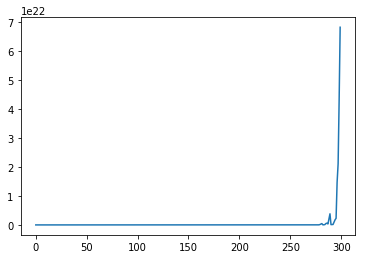

In [183]:
# plot the prediction error 
plt.plot(arrayloss)